In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from scipy import interpolate

In [2]:
## import 

In [3]:
for root, dirs, files in os.walk(".", topdown=False):
   for name in files:
      print(os.path.join(root, name))
   for name in dirs:
      print(os.path.join(root, name))

./ITMY/.ipynb_checkpoints/Untitled1-checkpoint.ipynb
./ITMY/.ipynb_checkpoints/Untitled-checkpoint.ipynb
./ITMY/1228084324_1228095124.npz
./ITMY/1228084324_1228109524.npz
./ITMY/1228084324_1228091524.npz
./ITMY/1228084324_1228113124.npz
./ITMY/1228084324_1228084924.npz
./ITMY/1228084324_1228098724.npz
./ITMY/1228084324_1228116724.npz
./ITMY/1228084324_1228105924.npz
./ITMY/1228084324_1228102324.npz
./ITMY/just_self.npz
./ITMY/.ipynb_checkpoints
./ETMX/1228084324_1228095124.npz
./ETMX/1228084324_1228109524.npz
./ETMX/1228084324_1228091524.npz
./ETMX/1228084324_1228113124.npz
./ETMX/1228084324_1228084924.npz
./ETMX/1228084324_1228098724.npz
./ETMX/1228084324_1228116724.npz
./ETMX/readme.txt
./ETMX/1228084324_1228105924.npz
./ETMX/1228084324_1228102324.npz
./.ipynb_checkpoints/plt_distortion-checkpoint.ipynb
./plt_distortion.ipynb
./.DS_Store
./ITMY
./ETMX
./.ipynb_checkpoints


# ITMY

In [4]:
prof = np.load('ITMY/1228084324_1228095124.npz')

In [5]:
def raw_wavefront_plot(wavefront_file, resolution=1):
    profile = np.load('ITMY/1228084324_1228095124.npz')
    ends = int((len(profile['wavefront'][:][1])-1)/2)
    rng_hlvd = lambda nd, rz : np.arange(-nd,nd+1,rz)
    rz_up = 1
    x = rng_hlvd(ends,rz_up)
    y = x
    X, Y = np.meshgrid(x,y)
    if resolution < rz_up:
        f = interpolate.interp2d( x, y, prof['wavefront'], kind='cubic')
        x2 = rng_hlvd(ends, resolution)
        y2 = x2
        X2, Y2 = np.meshgrid(x2, y2)
        Z2 = f(x2,y2)
    else:
        X2 = X
        Y2 = Y
        Z2 = profile['wavefront']
    ax = plt.figure(figsize=(30,30)).add_subplot(projection='3d')
    ax.plot_surface(X, Y, prof['wavefront'], edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.1, antialiased=True)
    ax.contour(X, Y, prof['wavefront'], zdir='z', offset=-250, cmap='coolwarm')
    ax.contour(X, Y, prof['wavefront'], zdir='x', offset=-50, cmap='coolwarm')
    ax.contour(X, Y, prof['wavefront'], zdir='y', offset=50, cmap='coolwarm')

    ax.set(xlim=(-50, 50), ylim=(-50, 50), zlim=(-250, 0),
           xlabel='X', ylabel='Y', zlabel='Z')
    ax.view_init(elev=15,azim=-30)
    

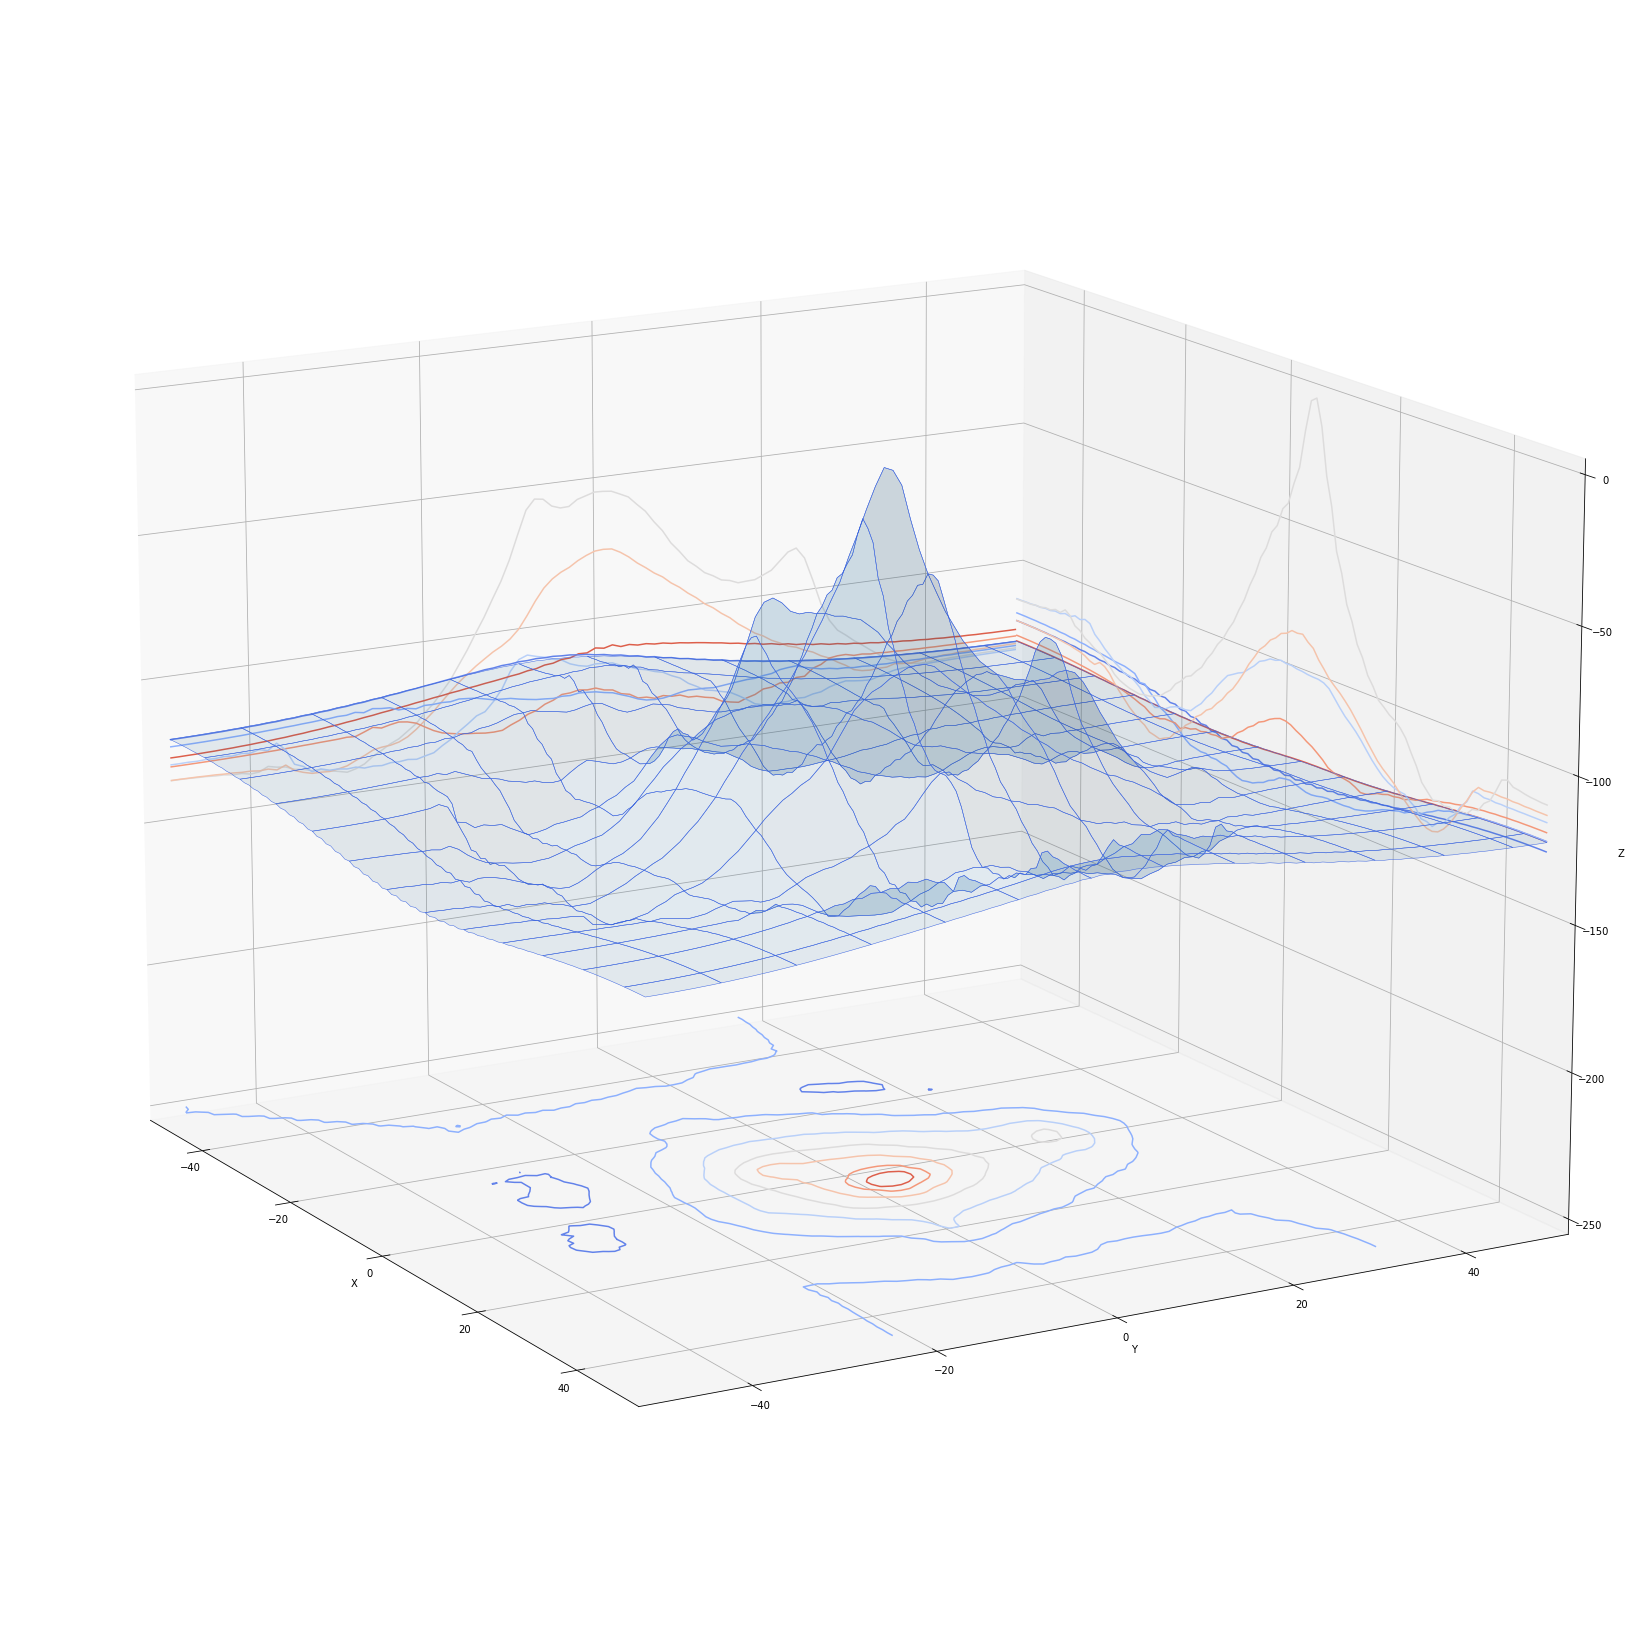

In [6]:
raw_wavefront_plot('ITMY/1228084324_1228095124.npz')

In [6]:
prof.files

['optic', 'reference', 'show', 'y', 'x', 'ifo', 'wavefront']

In [7]:
prof['optic']

array('ITMY', dtype='<U4')

In [8]:
prof['wavefront']

array([[-120.03311504, -120.01086273, -119.99926706, ..., -126.34168792,
        -126.29688969, -126.29174809],
       [-119.99836948, -119.99630695, -119.99067379, ..., -126.33728445,
        -126.29265792, -126.2874731 ],
       [-119.93488522, -119.93878207, -119.94435807, ..., -126.28924982,
        -126.24339841, -126.23841287],
       ...,
       [-127.26809374, -127.27094186, -127.29455299, ..., -122.80855621,
        -122.77333146, -122.7690196 ],
       [-127.29106314, -127.29389022, -127.31704376, ..., -122.85313367,
        -122.81917496, -122.81473368],
       [-127.29390254, -127.2967267 , -127.31987592, ..., -122.85536449,
        -122.8212337 , -122.81682471]])

In [9]:
ends=int((len(prof['wavefront'][:][1])-1)/2)

In [10]:
res = 1
x = np.arange(-ends,ends+res,res)
y = x
X, Y = np.meshgrid(x,y)

In [11]:
f = interpolate.interp2d( x, y, prof['wavefront'], kind='cubic')

In [12]:
res2 = .1
x2 = np.arange(-ends,ends+res2,res2)
y2 = x2
X2, Y2 = np.meshgrid(x2,y2)

In [13]:
Z2 = f(x2,y2)

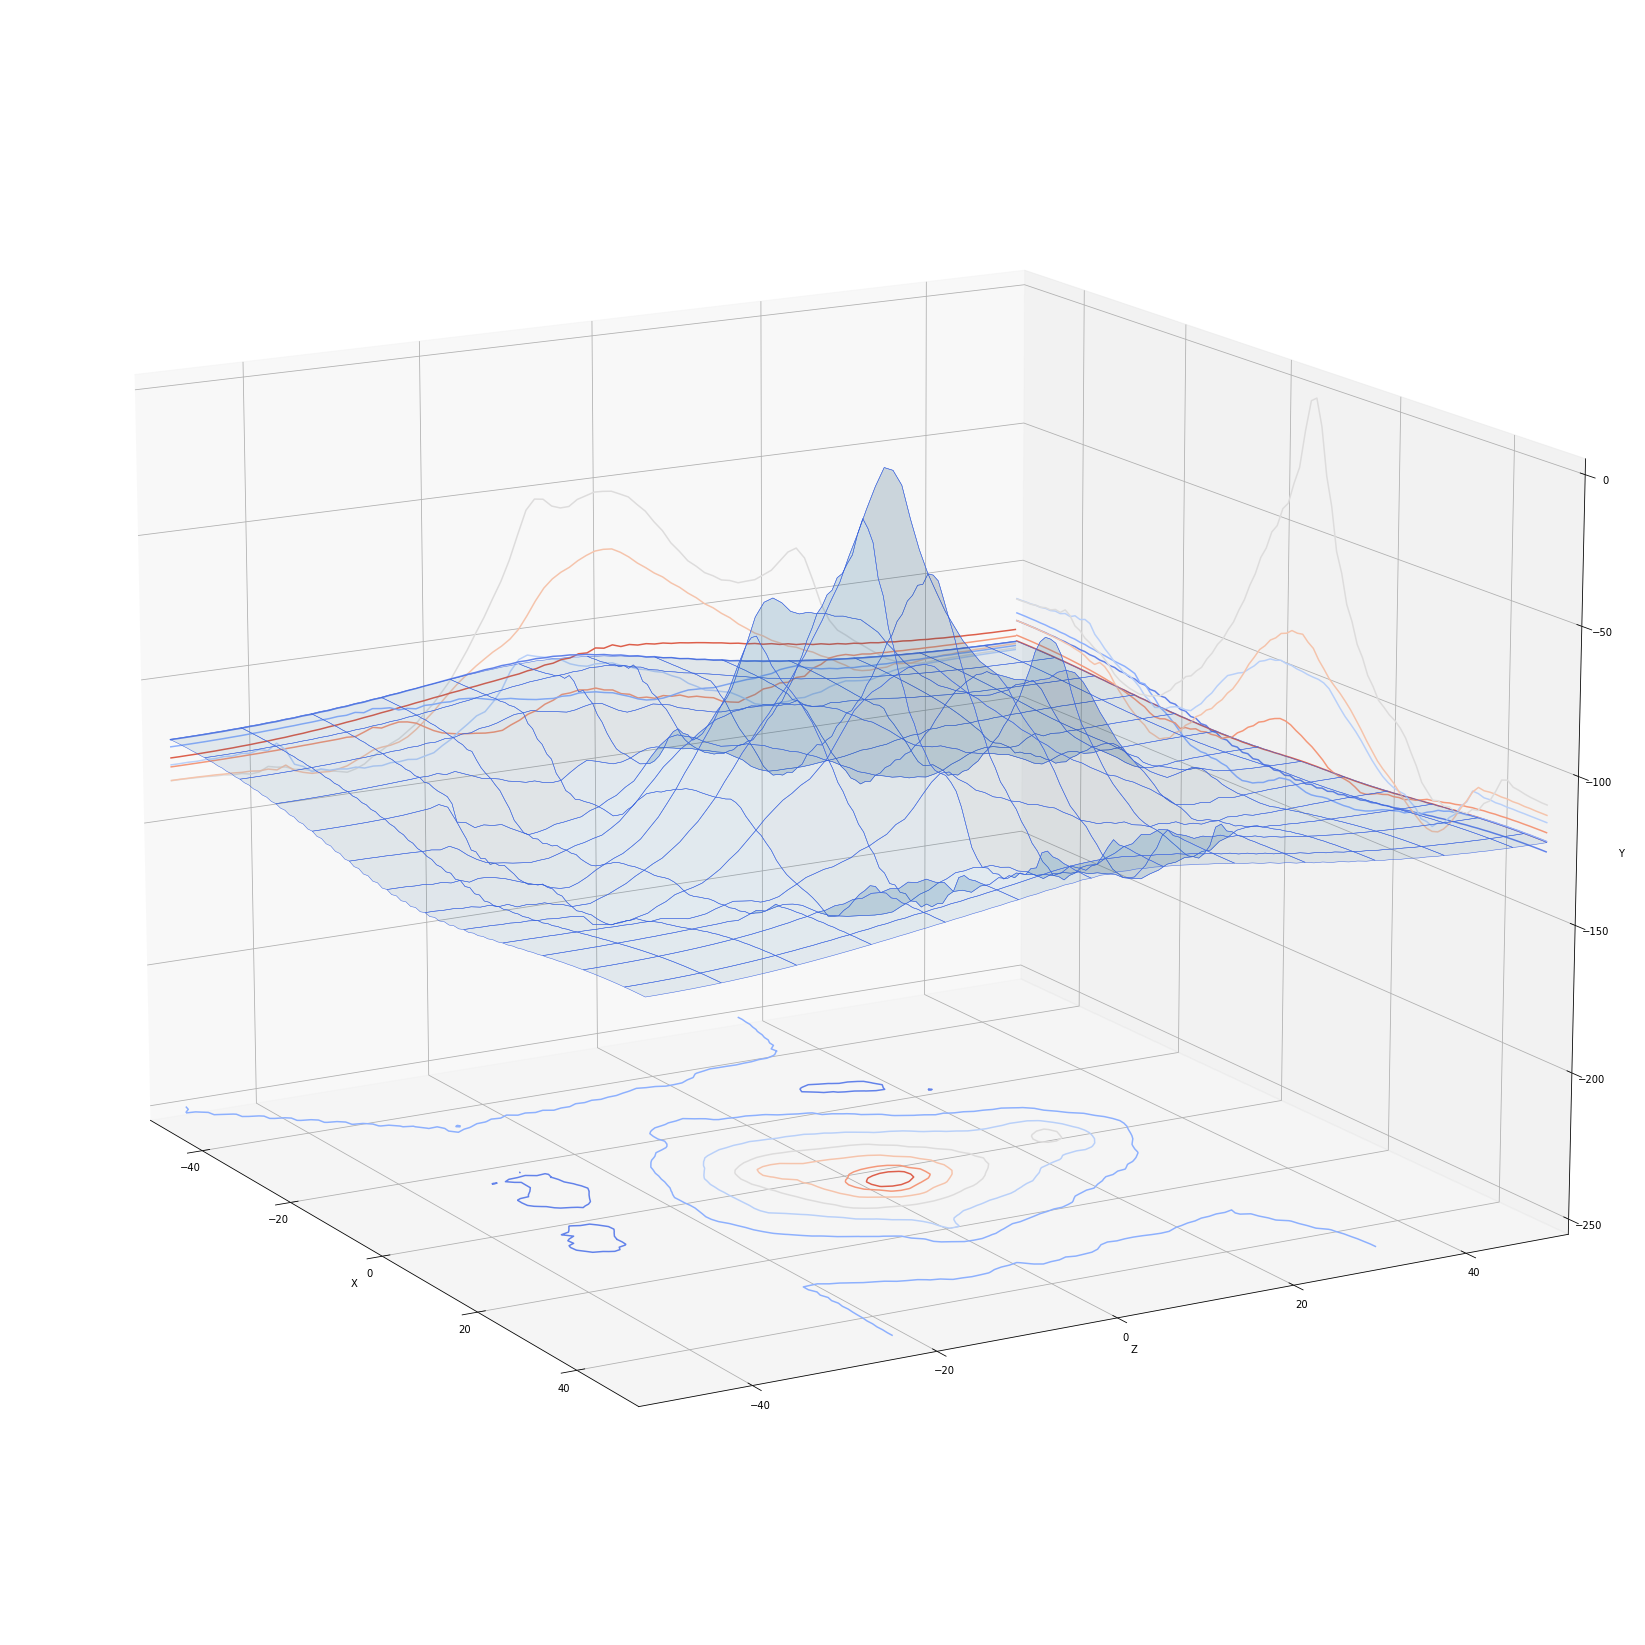

In [32]:
ax = plt.figure(figsize=(30,30)).add_subplot(projection='3d')
ax.plot_surface(X, Y, prof['wavefront'], edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.1, antialiased=True)
ax.contour(X, Y, prof['wavefront'], zdir='z', offset=-250, cmap='coolwarm')
ax.contour(X, Y, prof['wavefront'], zdir='x', offset=-50, cmap='coolwarm')
ax.contour(X, Y, prof['wavefront'], zdir='y', offset=50, cmap='coolwarm')

ax.set(xlim=(-50, 50), ylim=(-50, 50), zlim=(-250, 0),
       xlabel='X', ylabel='Z', zlabel='Y')
ax.view_init(elev=15,azim=-30)

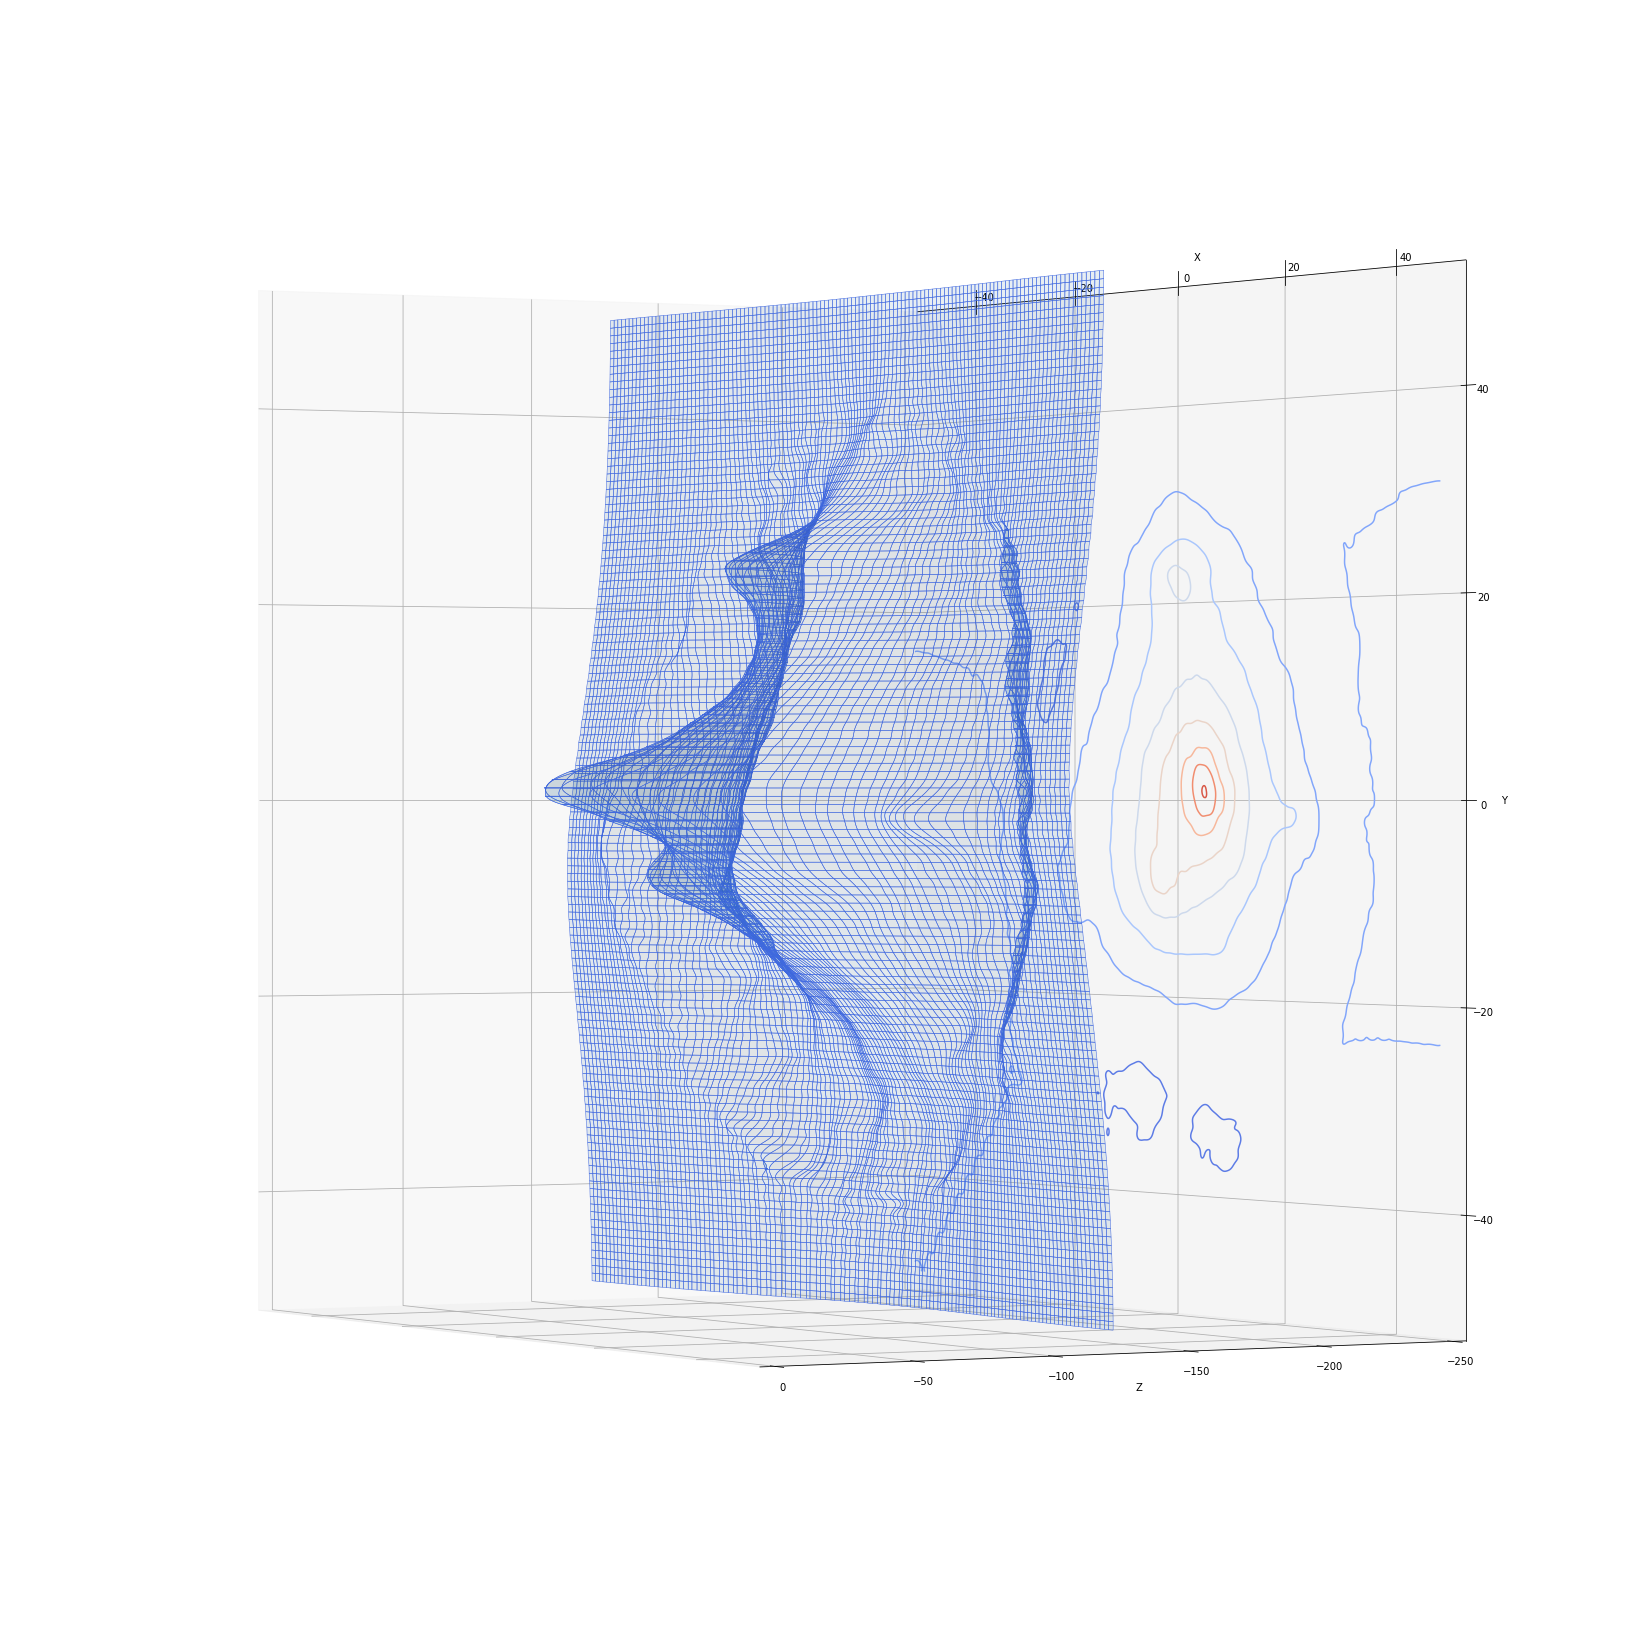

In [34]:
ax2 = plt.figure(figsize=(30,30)).add_subplot(projection='3d')
ax2.plot_surface(X2, Y2, Z2, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.1, antialiased=True)
ax2.contour(X2, Y2, Z2, zdir='z', offset=-250, cmap='coolwarm')
#ax2.contour(X2, Y2, Z2, zdir='x', offset=-50, cmap='coolwarm')
#ax2.contour(X2, Y2, Z2, zdir='y', offset=50, cmap='coolwarm')

ax2.set(xlim=(-50, 50), ylim=(-50, 50), zlim=(-250, 0),
       xlabel='X', ylabel='Y', zlabel='Z')
ax2.view_init(elev=30, azim=0, roll=90)


In [17]:
ax2.view_init?

Signature: ax2.view_init(elev=None, azim=None)
Docstring:
Set the elevation and azimuth of the axes in degrees (not radians).

This can be used to rotate the axes programmatically.

'elev' stores the elevation angle in the z plane (in degrees).
'azim' stores the azimuth angle in the (x, y) plane (in degrees).

if 'elev' or 'azim' are None (default), then the initial value
is used which was specified in the :class:`Axes3D` constructor.
File:      ~/Library/Python/3.8/lib/python/site-packages/mpl_toolkits/mplot3d/axes3d.py
Type:      method
